In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.options.display.max_columns = None # to see all the columns

In [2]:
url_1 = "https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/companies_data_world.csv"
df = pd.read_csv(url_1, encoding='ISO-8859-1')
df.head(2)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network Media,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14


# Scraping données

In [3]:
#!pip install yfinance
#!pip install googlesearch-python

In [4]:
import yfinance as yf
from googlesearch import search

In [5]:
df = df[df["status"] == "ipo"]
df.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
139,/organization/21vianet,21viaNet,http://www.ch.21vianet.com,Software|Web Hosting,396000000,ipo,CHN,22,Beijing,Beijing,5,2009-10-16,2008-02-13,2014-12-04
140,/organization/22nd-century-group,22nd Century Group,http://www.xxiicentury.com,Biotechnology,15034750,ipo,USA,NY,NY - Other,Clarence,6,1998-01-01,2010-12-28,2014-09-18
201,/organization/2u,2U Inc.,http://2u.com,EdTech|Education|Software,95875000,ipo,USA,MD,MD - Other,Hyattsville,6,2008-01-01,2009-03-25,2013-10-21
270,/organization/3d-systems,3D Systems,http://www.3dsystems.com,Software,169500000,ipo,USA,SC,SC - Other,Rock Hill,3,1986-01-01,2014-01-15,2014-10-13
436,/organization/58-com,58.com,http://www.58.com,Curated Web|Internet|Software,876780000,ipo,CHN,19,CHN - Other,Chaoyang,6,2005-01-01,2006-02-01,2014-06-27


In [6]:
df1 = df[["name"]]
df1.head(5)

,name
139,21viaNet
140,22nd Century Group
201,2U Inc.
270,3D Systems
436,58.com


In [7]:
def name_convert(self):

    searchval = 'yahoo finance '+self
    link = []
    #limits to the first link
    for url in search(searchval, tld='es', lang='es', stop=1):
        link.append(url)

    link = str(link[0])
    link=link.split("/")
    if link[-1]=='':
        ticker=link[-2]
    else:
        x=link[-1].split('=')
        ticker=x[-1]

    return(ticker)

In [8]:
df1_a = df1.copy()
df1_a.head(5)

,name
139,21viaNet
140,22nd Century Group
201,2U Inc.
270,3D Systems
436,58.com


In [9]:
df1_a["name_ticker"] = df1_a["name"].apply(name_convert)
df1_a.head(5)

,name,name_ticker
139,21viaNet,VNET
140,22nd Century Group,XXII
201,2U Inc.,TWOU
270,3D Systems,DDD
436,58.com,finance.yahoo.com


In [10]:
df1_a.to_csv("scrapping_tickers.csv")

In [11]:
df1_a = pd.read_csv("scrapping_tickers.csv").drop(["Unnamed: 0"], axis=1)
df1_a["lenticker"] = df1_a["name_ticker"].str.len()
df1_a = df1_a[df1_a["lenticker"]<6]
df1_a.head(5)

,name,name_ticker,lenticker
0,21viaNet,VNET,4.0
1,22nd Century Group,XXII,4.0
2,2U Inc.,TWOU,4.0
3,3D Systems,DDD,3.0
6,6D Global Technologies,SIXD,4.0


In [12]:
df1_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034 entries, 0 to 1546
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1034 non-null   object 
 1   name_ticker  1034 non-null   object 
 2   lenticker    1034 non-null   float64
dtypes: float64(1), object(2)
memory usage: 32.3+ KB


In [13]:
description = []
for i in df1_a["name_ticker"]:
    msft = yf.Ticker(i).info
    # get stock info
    x = msft.get('longBusinessSummary')
    description.append(x)

In [14]:
df1_a['description'] = description
df1_a.head(10)

,name,name_ticker,lenticker,description
0,21viaNet,VNET,4.0,"VNET Group, Inc., an investment holding company, provides hosting and related services to Internet companies, government entities, blue-chip enterprises, and small-to mid-sized enterprises in the People's Republic of China. It offers hosting and related services to house servers and networking equipment in its data centers, and connects them through a data transmission network. The company's hosting and related services include managed hosting services that offer data center space to house its customers' servers and networking equipment, and provide tailored server administration services; and interconnectivity services that enable customers to connect their servers with internet backbones and other networks through its border gateway protocol network or single-line, dual-line, or multiple-line network. Its hosting and related services also comprise cloud services that enable businesses to run their applications over the internet using its IT infrastructure; virtual private network services; hybrid IT Services, which provide customers with a complete package of infrastructure service offerings; and other value-added services, such as firewall, server load balancing, data backup and recovery, data center management, server management, and backup server services. In addition, the company provides traffic charts and analysis, gateway monitoring for servers, domain name system setup, defense mechanism against distributed denial of service attacks, basic setting of switches and routers, and virus protections; and managed network service. As of December 31, 2020, it operated 32 self-built data centers housing 49,876 cabinets and 52 partnered data centers housing with 3,677 cabinets. It has a strategic partnership with Microsoft Corporation. The company was formerly known as 21Vianet Group, Inc. and changed its name to VNET Group, Inc. in October 2021. VNET Group, Inc. was founded in 1999 and is headquartered in Beijing, the People's Republic of China."
1,22nd Century Group,XXII,4.0,"22nd Century Group, Inc., a biotechnology company, develops plant-based solutions for the life science, consumer product, and pharmaceutical markets. It develops very low nicotine content tobacco and cigarette products under the Moonlight and Moonlight Menthol names; and SPECTRUM research cigarettes for use in independent clinical studies. 22nd Century Group, Inc. has collaboration with Keygene N.V. to develop hemp/cannabis plants for exceptional cannabinoid profiles and other superior agronomic traits for medical, therapeutic, and agricultural uses, as well as other applications. 22nd Century Group, Inc. was founded in 1998 and is headquartered in Buffalo, New York."
2,2U Inc.,TWOU,4.0,"2U, Inc. operates as an education technology company in the United States, Hong Kong, South Africa, and the United Kingdom. The company operates in two segments, Degree Program and Alternative Credential. The Degree Program segment provides the technology and services to nonprofit colleges and universities to enable the online delivery of degree programs. This segment targets students seeking an undergraduate or graduate degree. The Alternative Credential segment offers online short courses, and technical and skills-based boot camps through nonprofit colleges and universities. This segment targets students seeking to reskill or upskill through shorter duration and lower-priced offerings. It also provides 2UOS, a platform that provides front-end and back-end cloud-based SaaS technology and technology-enabled services. The company was formerly known as 2Tor Inc. and changed its name to 2U, Inc. in October 2012. 2U, Inc. was founded in 2008 and is headquartered in Lanham, Maryland."
3,3D Systems,DDD,3.0,"3D Systems Corporation, through its subsidiaries, provides 3D printing and digital manufacturing solutions in the Americas, Europe, the Middle East, Africa, and the Asia Pacific. The company offers 3D printers, su

In [15]:
df1_a.to_csv("scrapping_tickers_description.csv")

In [16]:
df1_a = pd.read_csv("scrapping_tickers_description.csv").drop(["Unnamed: 0"], axis=1)
df1_a.head(2)

,name,name_ticker,lenticker,description
0,21viaNet,VNET,4.0,"VNET Group, Inc., an investment holding company, provides hosting and related services to Internet companies, government entities, blue-chip enterprises, and small-to mid-sized enterprises in the People's Republic of China. It offers hosting and related services to house servers and networking equipment in its data centers, and connects them through a data transmission network. The company's hosting and related services include managed hosting services that offer data center space to house its customers' servers and networking equipment, and provide tailored server administration services; and interconnectivity services that enable customers to connect their servers with internet backbones and other networks through its border gateway protocol network or single-line, dual-line, or multiple-line network. Its hosting and related services also comprise cloud services that enable businesses to run their applications over the internet using its IT infrastructure; virtual private network services; hybrid IT Services, which provide customers with a complete package of infrastructure service offerings; and other value-added services, such as firewall, server load balancing, data backup and recovery, data center management, server management, and backup server services. In addition, the company provides traffic charts and analysis, gateway monitoring for servers, domain name system setup, defense mechanism against distributed denial of service attacks, basic setting of switches and routers, and virus protections; and managed network service. As of December 31, 2020, it operated 32 self-built data centers housing 49,876 cabinets and 52 partnered data centers housing with 3,677 cabinets. It has a strategic partnership with Microsoft Corporation. The company was formerly known as 21Vianet Group, Inc. and changed its name to VNET Group, Inc. in October 2021. VNET Group, Inc. was founded in 1999 and is headquartered in Beijing, the People's Republic of China."
1,22nd Century Group,XXII,4.0,"22nd Century Group, Inc., a biotechnology company, develops plant-based solutions for the life science, consumer product, and pharmaceutical markets. It develops very low nicotine content tobacco and cigarette products under the Moonlight and Moonlight Menthol names; and SPECTRUM research cigarettes for use in independent clinical studies. 22nd Century Group, Inc. has collaboration with Keygene N.V. to develop hemp/cannabis plants for exceptional cannabinoid profiles and other superior agronomic traits for medical, therapeutic, and agricultural uses, as well as other applications. 22nd Century Group, Inc. was founded in 1998 and is headquartered in Buffalo, New York."


In [17]:
text = ' '.join(df1_a.name_ticker)

In [18]:
text

'VNET XXII TWOU DDD SIXD EGHT ATEN AACAY astm attbf ABB ABT ABLX ABHDD AC.TO actg ACAD ACNV AXDX xlrn NGM ACCO ACRX AKAOQ ACHN ACRS acor ACINX AMCY atnm ON acur ACUS adms ADMP ADAP ADTM ADXN ADUS ADPTQ ADMA ADP news adxs aehr aeri aro AEMD AFMD agen AGRX AGIO ANTE MIMO akba ALRM ALDX alxn baba ALGN ALIM ADGL agy.l NPCUF ALL ALNY AOSL atec ATGN AMRN BRJ.F AMZN AMBA AMBO MGP.L ammj GNOW adge DGX AMGN AFSLF fold ampe APPB AMSC AMRS ANAC news ANGI v1 ANTH AOXG APIC ARI APPF AAPL apdn AGTC amnl AAOI AQB abio rkda ARDX ARNA ACRE argx RWLK args art.v ASPW arql Arry arraf ARWR ASND ASTI aspn AZPN ASUR CLKS atra athn ATHX ATOS atrc attu life AEYE ausi 1 adat GCEH aveo AVGR AVA avu.v ACLS AXPWQ AXGN BA.L BIDU BLDP BGO.L BZUN BNED cuda bcon BLCM BNFT ekso BYOC BGMD BPTH BIOC BCRX BDSI BIOL blrx ABMT BVXV ANIP bota BT6.F BTCS BB BERI NILE BLUE BFLY bphx bpmc bmc BK BODY WIFI bosc EPAY BVX BOX BCLI BWAY BLIN BCOV BMY BR prss CAMP CALB CALA CALX ROXIF CATC CSIQ CGIX CANF CARA CBYL cdxi CAH CSII CSII

In [19]:
stock = yf.download(text, start="2021-08-01", end="2021-11-25")
stock = stock["Close"]
stock = stock.reset_index()
stock.head(5)

[*********************100%***********************]  1006 of 1006 completed

204 Failed downloads:
- ADGL: No data found for this date range, symbol may be delisted
- KIOR: None
- WSSI: None
- 3VP.F: None
- MEMS: None
- HDP: No data found for this date range, symbol may be delisted
- GWPH: No data found, symbol may be delisted
- ARQL: No data found, symbol may be delisted
- CCIH: No data found for this date range, symbol may be delisted
- PRSS: No data found for this date range, symbol may be delisted
- IMRSQ: None
- PTTL: None
- ONSM: No data found for this date range, symbol may be delisted
- CORI: No data found for this date range, symbol may be delisted
- RSYS: No data found for this date range, symbol may be delisted
- CBLI: No data found, symbol may be delisted
- ATTU: No data found, symbol may be delisted
- SYNC: No data found, symbol may be delisted
- V1: No data found, symbol may be delisted
- TUBE: None
- SCIO: No data found, symbol may be delisted
- LDK: None
- CREE: No data 

,Date,1,2IB.F,3VP.F,AACAY,AAOI,AAPL,ABB,ABHDD,ABIO,ABLX,ABMT,ABT,AC.TO,ACAD,ACCO,ACHN,ACINX,ACLS,ACNV,ACOR,ACRE,ACRS,ACRX,ACTG,ACUR,ACUS,ADAP,ADAT,ADGE,ADGL,ADMA,ADMP,ADMS,ADP,ADPTQ,ADTM,ADUS,ADXN,ADXS,AEHR,AEMD,AERI,AEYE,AFMD,AFSLF,AGEN,AGIO,AGRX,AGTC,AGY.L,AKAOQ,AKBA,AKTX,ALDX,ALGN,ALIM,ALL,ALNY,ALPN,ALRM,ALXN,AMBA,AMBO,AMCY,AMGN,AMHD,AMMJ,AMNL,AMPE,AMRN,AMRS,AMSC,AMZN,ANAC,ANGI,ANIP,ANTE,ANTH,AOSL,AOXG,APDN,APIC,APPB,APPF,APVS,AQB,ARDX,ARGS,ARGX,ARI,ARNA,ARO,ARQL,ARRAF,ARRY,ART.V,ARWR,ASND,ASPN,ASPW,ASTI,ASTM,ASUR,ATEC,ATEN,ATGN,ATHN,ATHX,ATNF,ATNM,ATOS,ATRA,ATRC,ATTBF,ATTU,AURX,AUSI,AVA,AVEO,AVGR,AVU.V,AXDX,AXGN,AXPWQ,AXSM,AZPN,BA.L,BABA,BB,BCLI,BCON,BCOV,BCRX,BDSI,BERI,BFLY,BGMD,BGO.L,BIDU,BIOC,BIOL,BK,BLCM,BLDP,BLIN,BLRX,BLUE,BMC,BMY,BNED,BNFT,BODY,BOSC,BOTA,BOX,BPHX,BPMC,BPTH,BR,BRJ.F,BT6.F,BTCS,BTU,BVX,BVXV,BWAY,BYOC,BZUN,CAH,CALA,CALB,CALX,CAMP,CANF,CARA,CASY,CATB,CATC,CAVM,CBAY,CBLI,CBPO,CBSH,CBYL,CCE.V,CCIH,CCOI,CCXI,CDEX,CDNA,CDR,CDRBQ,CDTX,CDW,CDXC,CDXI,CDXS,CERC,CERS,CERU,CFBK,CFMS,CGIX,CHCR,CHEK,CHGG,CHKP,CHMA,CHRS,CHTR,CIDM,CLDN,CLDX,CLKS,CLSN,CLVS,CMCSA,CMRX,CNC,CNCE,CNET,CNS,CNTFY,CNXR,COB,CODI,COL,COLL,COMM,CORI,CORR,CORT,COTY,CPYT,CREE,CRIS,CRL,CRM,CRMBQ,CRMD,CRNT,CROX,CRSR,CRSS,CRTO,CRWG,CRXM,CRY,CSBR,CSCO,CSGS,CSII,CSIQ,CSLT,CSOD,CSX,CTHR,CTMX,CUBE,CUDA,CUI,CVAT,CVM,CVT,CWR.L,CXDO,CYBR,CYCC,CYDY,CYRN,CYTK,CYTR,DANG,DD,DDD,DEL,DEPO,DGLY,DGX,DIGP,DIOD,DKS,DLPH,DMD,DMPWW,DNACF,DNAI,DPRX,DQ,DRIO,DRNA,DRRX,DSCI,DSS,DTEA,DWCH,DWRE,DXCM,DYAI,DYNT,DYSL,EBAY,EBIO,EBIX,EBS,ECHO,ECOM,ECTE,ECYT,EDTXF,EFOI,EFX,EGHT,EGLTQ,EGRX,EKSO,EL.V,ELGX,ELON,ELTP,EMKR,ENA.V,ENB,ENOC,ENPH,ENTA,ENV,EORBF,EPAM,EPAY,EPAZ,EPZM,EQIX,ESE,ESPR,ESYL,ETEK,ETRM,ETSY,EVC,EVH,EVOK,EVTI,EXAS,EYEG,FATE,FB,FCEL,FDC,FENG,FEYE,FIVE,FIVN,FLDM,FLEX,FLT,FLXN,FMS,FOLD,FORM,FPAY,FPRX,FRP,FSLR,FTNT,FV,GAIAX,GALT,GAME,GBEI,GBIM,GBLX,GBT,GCAP,GCEH,GCO,GD,GDOT,GDPEF,GE,GENE,GEOS,GERN,GEVO,GGLT,GIGA,GIGM,GIMO,GKOS,GLOB,GLPG,GLRI,GLUU,GLYC,GMED,GMTN,GMVD,GNBT,GNOW,GOGO,GOMO,GOOG,GOVX,GPRO,GREE,GRPN,GRUB,GSS,GTAT,GTHP,GTX,GWPH,GWTI,HALO,HBCP,HCI,HDII,HDP,HDVY,HEWA,HGEN,HGGGQ,HOLX,HON,HQCL,HQY,HRZN,HSITF,HSKA,HSTM,HSTO,HTBX,HTGM,HUBS,HWAY,HYGN,HZD.L,HZNP,IBTX,ICAD,ICE,ICLD,ICON,ICPT,IDN,IDRA,IGAP,IGLDF,IGXT,IMGN,IMH,IMM.L,IMMU,IMMY,IMNPQ,IMO.L,IMPR,IMPV,IMRSQ,IMUN,INFI,INFN,INFO,INGN,INPC,INS,INSM,INST,INTU,INVE,INVN,INVO,INVT,IONS,IPHI,IPLY,IPSI,IPWR,IQNT,IRWD,ITM.L,ITMSF,IVTY,IWSY,IZEA,JACK,JAGX,JAY.L,JAZZ,JD,JMEI,JNJ,JNPR,JOB,JTPY,KANG,KC,KEYW,KIOR,KJI,KMPH,KNIT,KOS,KPTI,KTWO,KZ,LBTYA,LC,LCTC,LCTX,LDK,LDRH,LEN,LFVN,LGND,LIFE,LIME,LIN,LITB,LIXT,LJPC,LMT,LNVGY,LOCK,LOCMQ,LOGM,LPSN,LQMT,LRN,LSCG,LTRX,LVCLY,LVLT,LWLG,LXRX,LZ1.F,MACK,MARA,MARK,MATR,MBII,MCK,MCRB,MCUR,MD,MDGS,MDWD,MEDS,MEIP,MEMS,MG,MGIC,MGNX,MGP.L,MIME,MIMO,MIR.V,MITK,MKTO,MLSS,MMM,MMS,MMX.L,MMYT,MNDO,MNKD,MNOV,MNSB,MNTX,MOBL,MOBQ,MODN,MOGO,MOH,MOR,MORN,MPWR,MRC,MRIN,MRNS,MTACU,MTLS,MTSI,MTST,MU,MVBF,MVIS,MXL,MYR=X,MYSZ,NA.TO,NABI,NAME,NAVB,NBIO,NBIX,NBRV,NBY,NCR,NEE,NEO,NEON,NEPH,NERV,NETE,NEWR,NEWS,NFLX,NGM,NILE,NKTR,NLST,NMRX,NNDM,NNVC,NOAH,NOW,NPCUF,NPTN,NQ=F,NRTHF,NRTSF,NSHSF,NSPR,NSTG,NTCXF,NTE.F,NTEC,NTES,NTGR,NTIP,NTMD,NTRA,NTSFF,NTWK,NURO,NUVA,NVAX,NVDA,NVRO,NVTA,NWBO,NWSA,NXPI,NYT,OCUL,OGI,OMBP,OMER,ON,ONCS,ONCY,ONDK,ONE,ONSM,ONTX,ONVO,ONXC,OPGN,OPK,OPMG,OPRA,OPTT,ORCT,OREX,ORMP,OSIS,OSTK,OTEX,OTIC,OVAS,OVIT,OXFD,OXGN,P,PACB,PANC,PANW,PATH,PBIO,PBPB,PBYI,PCAF,PCTY,PCYG,PEB,PEIX,PEN,PEYE,PFM.V,PFNX,PFSW,PHOT,PIRS,PKT.V,PMAH,PODD,PPG,PRFT,PRKR,PRLB,PRMW,PRO,PRPH,PRSS,PRTS,PSDV,PSTG,PSTI,PTCT,PTK.V,PTLA,PTN,PTTL,PURE,PWR,PXH.F,PYR,QLIK,QLYS,QMCO,QMKR,QNST,QRHC,QSII,QTMM,QTNT,QTS,QTWO,QUAD,QUNR,QUOT,QURE,RACK,RARE,RCKZF,RDCM,RDHL,RDUS,REFG,REGI,REGN,RENN,REPH,RESN,RGEN,RGLS,RGNX,RIBT,RIGL,RITT,RKDA,RKFL,RKUNF,RKUS,RLJE,RMBS,RMTI,RNET,RNG,ROAM,ROSGQ,ROXIF,RPD,RPRX,RPX.V,RSASF,RSH,RSTAY,RSYS,RTX,RUN,RVNC,RVUE,RWLK,RXII,RXT,RYU.V,SAGE,SAH,SAIC,SAP,SB,SBBP,SBRCY,SBUX,SCAI,SCIO,SCON,SCOR,SCTY,SCYX,SEAB,SEAC,SEDG,SFBS,SFT,SFUN,SGEN,SGMO,SGRY,SGTB,SHC,SHOP,SIEN,SINA,SIRF,SIRI,SIXD,SLCA,SLNM,SMLR,SM

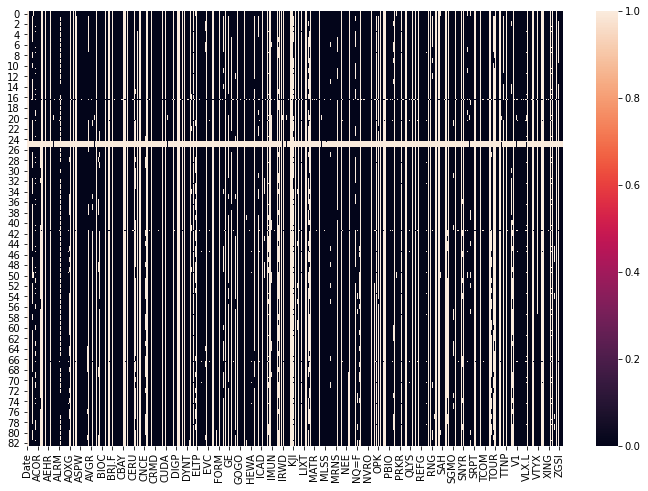

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(stock.isnull())
plt.show()

In [21]:
stock.shape

(83, 1007)

In [22]:
print("Percentage of missing values: ")
display((100*stock.isnull().sum()/stock.shape[0]).sort_values(ascending=False))

Percentage of missing values: 


OREX     100.000000
PCAF     100.000000
CORI     100.000000
COL      100.000000
COB      100.000000
            ...    
GOGO       1.204819
GOOG       1.204819
PXH.F      0.000000
MYR=X      0.000000
Date       0.000000
Length: 1007, dtype: float64

In [23]:
stock1 = stock[stock.columns[stock.isnull().sum()/stock.shape[0] < 0.2]]

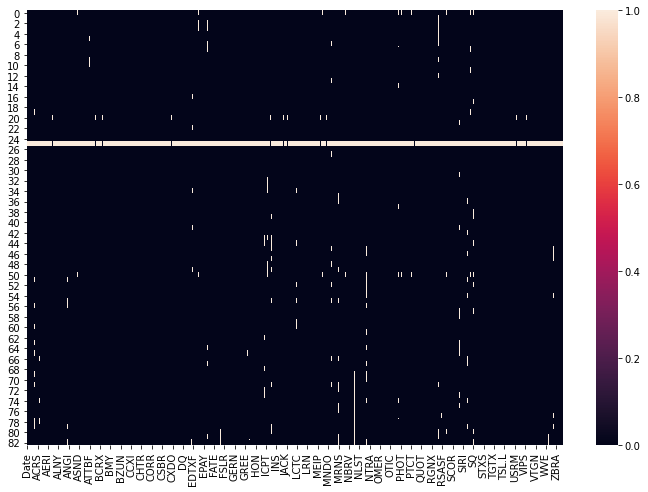

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(stock1.isnull())
plt.show()

In [25]:
stock1.shape

(83, 723)

In [26]:
stock1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Columns: 723 entries, Date to ZYNE
dtypes: datetime64[ns](1), float64(722)
memory usage: 468.9 KB


In [27]:
print("Percentage of missing values: ")
display((100*stock1.isnull().sum()/stock1.shape[0]).sort_values(ascending=False))

Percentage of missing values: 


NTCXF    19.277108
NETE     18.072289
IMUN     16.867470
PEYE     15.662651
MTACU    14.457831
           ...    
ENPH      1.204819
ENV       1.204819
MYR=X     0.000000
PXH.F     0.000000
Date      0.000000
Length: 723, dtype: float64

In [28]:
stock1.iloc[:,1:]= stock1.iloc[:,1:].interpolate(method='polynomial', order=2)

C:\Users\Huy Nam TRAN\anaconda3\envs\huynam\lib\site-packages\pandas\core\indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [29]:
stock1.head(5)

,Date,AACAY,AAOI,AAPL,ABB,ABIO,ABT,AC.TO,ACAD,ACCO,ACINX,ACLS,ACOR,ACRE,ACRS,ACRX,ACTG,ACUR,ADAP,ADMA,ADMP,ADMS,ADP,ADUS,ADXN,ADXS,AEHR,AEMD,AERI,AEYE,AFMD,AGEN,AGIO,AGRX,AGTC,AGY.L,AKBA,AKTX,ALDX,ALGN,ALIM,ALL,ALNY,ALPN,ALRM,AMBA,AMBO,AMGN,AMMJ,AMNL,AMPE,AMRN,AMRS,AMSC,AMZN,ANAC,ANGI,ANIP,ANTE,AOSL,APDN,APPF,AQB,ARDX,ARGX,ARI,ARNA,ARRY,ART.V,ARWR,ASND,ASPN,ASTI,ASUR,ATEC,ATEN,ATGN,ATHN,ATHX,ATNF,ATNM,ATOS,ATRA,ATRC,ATTBF,AUSI,AVA,AVEO,AVGR,AXDX,AXGN,AXSM,AZPN,BA.L,BABA,BB,BCLI,BCOV,BCRX,BDSI,BERI,BFLY,BGO.L,BIDU,BIOC,BIOL,BK,BLCM,BLDP,BLIN,BLRX,BLUE,BMY,BNED,BNFT,BODY,BOSC,BOX,BPMC,BPTH,BR,BTCS,BTU,BVXV,BWAY,BYOC,BZUN,CAH,CALA,CALB,CALX,CAMP,CANF,CARA,CASY,CATC,CBAY,CBSH,CCE.V,CCOI,CCXI,CDNA,CDR,CDTX,CDW,CDXC,CDXS,CERS,CFBK,CFMS,CHEK,CHGG,CHKP,CHRS,CHTR,CIDM,CLDX,CLSN,CLVS,CMCSA,CMRX,CNC,CNCE,CNET,CNS,CODI,COLL,COMM,CORR,CORT,COTY,CRIS,CRL,CRM,CRMD,CRNT,CROX,CRSR,CRSS,CRTO,CRWG,CRY,CSBR,CSCO,CSGS,CSII,CSIQ,CSLT,CSX,CTHR,CTMX,CUBE,CVAT,CVM,CVT,CWR.L,CXDO,CYBR,CYCC,CYDY,CYRN,CYTK,CYTR,DD,DDD,DGLY,DGX,DIGP,DIOD,DKS,DQ,DRIO,DRNA,DRRX,DSS,DTEA,DXCM,DYAI,DYNT,EBAY,EBIX,EBS,ECHO,ECOM,EDTXF,EFOI,EFX,EGHT,EGRX,EKSO,ELTP,EMKR,ENA.V,ENB,ENPH,ENTA,ENV,EPAM,EPAY,EPAZ,EPZM,EQIX,ESE,ESPR,ESYL,ETEK,ETSY,EVC,EVH,EVOK,EXAS,EYEG,FATE,FB,FCEL,FENG,FIVE,FIVN,FLDM,FLEX,FLT,FLXN,FMS,FOLD,FORM,FPAY,FSLR,FTNT,FV,GALT,GAME,GBLX,GBT,GCEH,GCO,GD,GDOT,GE,GENE,GEOS,GERN,GEVO,GIGM,GKOS,GLOB,GLPG,GLYC,GMED,GMVD,GNBT,GOGO,GOOG,GOVX,GPRO,GREE,GRPN,GRUB,GSS,GTHP,GTX,GWTI,HALO,HBCP,HCI,HDII,HDVY,HGEN,HOLX,HON,HQY,HRZN,HSKA,HSTM,HSTO,HTBX,HTGM,HUBS,HZNP,IBTX,ICAD,ICE,ICLD,ICPT,IDN,IDRA,IGAP,IGXT,IMGN,IMH,IMM.L,IMNPQ,IMUN,INFI,INFN,INFO,INGN,INS,INSM,INST,INTU,INVE,INVO,IONS,IPSI,IPWR,IRWD,ITM.L,ITMSF,IWSY,IZEA,JACK,JAGX,JAY.L,JAZZ,JD,JNJ,JNPR,JOB,KC,KMPH,KOS,KPTI,LBTYA,LC,LCTC,LCTX,LEN,LFVN,LGND,LIFE,LIN,LITB,LIXT,LJPC,LMT,LNVGY,LPSN,LQMT,LRN,LTRX,LWLG,LXRX,MACK,MARA,MARK,MBII,MCK,MCRB,MD,MDGS,MDWD,MEDS,MEIP,MG,MGIC,MGNX,MGP.L,MIME,MIMO,MIR.V,MITK,MLSS,MMM,MMS,MMX.L,MMYT,MNDO,MNKD,MNOV,MNSB,MNTX,MOBQ,MODN,MOGO,MOH,MOR,MORN,MPWR,MRC,MRIN,MRNS,MTACU,MTLS,MTSI,MU,MVBF,MVIS,MXL,MYR=X,MYSZ,NA.TO,NAVB,NBIO,NBIX,NBRV,NBY,NCR,NEE,NEO,NEON,NEPH,NERV,NETE,NEWR,NFLX,NGM,NILE,NKTR,NLST,NNDM,NNVC,NOAH,NOW,NPTN,NQ=F,NRTSF,NSPR,NSTG,NTCXF,NTES,NTGR,NTIP,NTRA,NTWK,NURO,NUVA,NVAX,NVDA,NVRO,NVTA,NWBO,NWSA,NXPI,NYT,OCUL,OGI,OMER,ON,ONCS,ONCY,ONTX,ONVO,OPGN,OPK,OPRA,OPTT,ORMP,OSIS,OSTK,OTEX,OTIC,PACB,PANW,PATH,PBIO,PBPB,PBYI,PCTY,PCYG,PEB,PEN,PEYE,PFM.V,PFSW,PHOT,PIRS,PKT.V,PODD,PPG,PRFT,PRKR,PRLB,PRMW,PRO,PRPH,PRTS,PSTG,PSTI,PTCT,PTK.V,PTN,PURE,PWR,PXH.F,PYR,QLYS,QMCO,QNST,QRHC,QTNT,QTWO,QUAD,QUOT,QURE,RARE,RDCM,RDHL,RDUS,REFG,REGI,REGN,RENN,REPH,RESN,RGEN,RGLS,RGNX,RIBT,RIGL,RKDA,RKFL,RKUNF,RMBS,RMTI,RNG,ROAM,ROXIF,RPD,RPRX,RPX.V,RSASF,RTX,RUN,RVNC,RWLK,RXT,RYU.V,SAGE,SAH,SAIC,SAP,SB,SBRCY,SBUX,SCOR,SCYX,SEAC,SEDG,SFBS,SFT,SFUN,SGEN,SGMO,SGRY,SGTB,SHC,SHOP,SIEN,SIRI,SLCA,SMLR,SMSI,SNAP,SNBR,SNDX,SNWR,SOHU,SPH,SPLK,SPN.V,SPNS,SPX.L,SQ,SQD.V,SQNS,SR,SRE,SREV,SRNA,SRPT,SSKN,SSYS,STE,STL,STT,STX,STXS,SUPN,SWI,SYSX,T,TBPH,TCEHY,TCOM,TCON,TDOC,TDS,TEDU,TER,TGEN,TGTX,TMDI,TNDM,TNXP,TOUR,TRMB,TRMR,TRN,TRU,TRUE,TRUP,TRVN,TSC,TSEM,TSL.L,TSLA,TTEK,TTGT,TTNP,TTOO,TWOU,TWTR,TXMD,TXN,UI,ULBI,ULTA,UNH,USRM,UTHR,UTSI,VAL.L,VBIV,VCRA,VCYT,VECO,VEEV,VET,VFC,VG,VHC,VIEW,VIPS,VKTX,VLX.L,VNDA,VNET,VNRX,VPG,VPT.V,VRCA,VRNS,VRTX,VSAT,VSL,VSTM,VTGN,VTNR,VUZI,VYGR,VZ,W,WB,WDAY,WDC,WHLR,WIX,WK,WOOF,WSM,WVE,XENE,XENT,XL,XLRN,XNCR,XNET,XRX,XTNT,XXII,YELP,YGYI,YY,Z,ZBRA,ZEN,ZGNX,ZION,ZIOP,ZM,ZNGA,ZSAN,ZYNE
0,2021-08-02,6.05,7.64,145.520004,36.430000,3.19,120.919998,NaN,21.000000,8.83,37.570000,38.560001,3.72,14.62,15.08,1.21,5.75,0.60,3.58,1.59,1.11,5.00,209.449997,85.110001,9.080,0.440,5.73,5.07,15.87,13.63,6.91,5.29,48.189999,1.22,3.64,26.85,2.60,1.64,9.02,700.000000,8.89,129.759995,177.960007,8.41,84.330002,97.769997,1.680,239.789993,0.136,0.02,1.36,4.22,14.46,13.87,3331.479980,9.75,11.44,33.369999,2.26,26.00,5.43,140.850006,4.87,1.68,308.760010,15.08,60.490002,12.96,NaN,68.010002,120.339996,36.849998,0.0

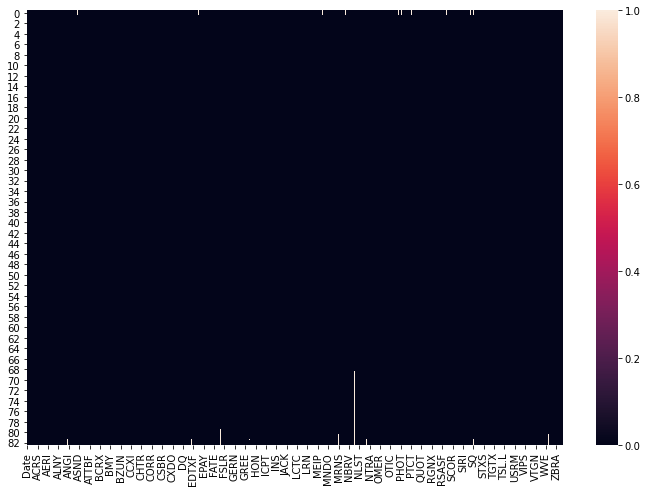

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(stock1.isnull())
plt.show()

In [31]:
stock1.to_csv("stock_3_months.csv")